In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns 

In [10]:
# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [12]:
# Inspect the Customers dataset
print("\nCustomers Dataset:\n")
print(customers.head())
print(customers.info())
print(customers.describe())


Customers Dataset:

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence C

In [14]:
# Inspect the Products dataset
print("\nProducts Dataset:\n")
print(products.head())
print(products.info())
print(products.describe())


Products Dataset:

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [16]:
# Inspect the Transactions dataset
print("\nTransactions Dataset:\n")
print(transactions.head())
print(transactions.info())
print(transactions.describe())


Transactions Dataset:

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         10

In [18]:
# Check for missing values
print("\nMissing Values in Customers:\n", customers.isnull().sum())
print("\nMissing Values in Products:\n", products.isnull().sum())
print("\nMissing Values in Transactions:\n", transactions.isnull().sum())


Missing Values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [20]:
# Check for duplicate rows
print("\nDuplicate Rows in Customers:", customers.duplicated().sum())
print("Duplicate Rows in Products:", products.duplicated().sum())
print("Duplicate Rows in Transactions:", transactions.duplicated().sum())


Duplicate Rows in Customers: 0
Duplicate Rows in Products: 0
Duplicate Rows in Transactions: 0


In [22]:
# Save clean data for analysis
customers.to_csv("customers_cleaned.csv", index=False)
products.to_csv("products_cleaned.csv", index=False)
transactions.to_csv("transactions_cleaned.csv", index=False)

## EDA: Analyze and visualize the datasets

In [25]:
# 1. Distribution of customers by region

C:\Users\parth\AppData\Local\Temp\ipykernel_688\1929943836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


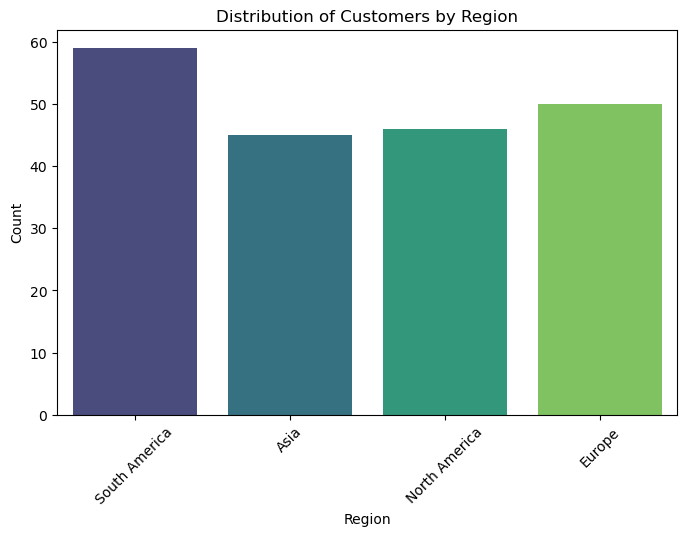

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title("Distribution of Customers by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\parth\AppData\Local\Temp\ipykernel_688\2306825373.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='ProductName', y='Price', palette='coolwarm')


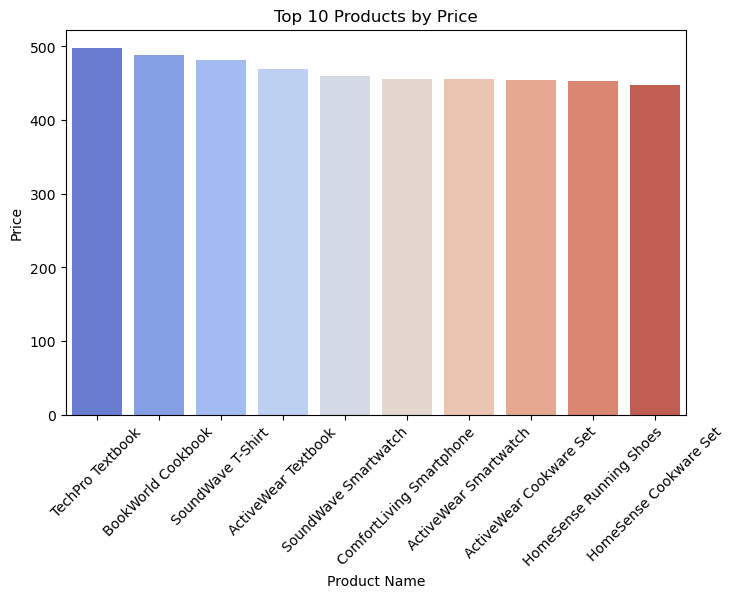

In [61]:
# 2. Top 10 products by price
top_products = products.nlargest(10, 'Price')
plt.figure(figsize=(8, 5))
sns.barplot(data=top_products, x='ProductName', y='Price', palette='coolwarm')
plt.title("Top 10 Products by Price")
plt.xlabel("Product Name")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

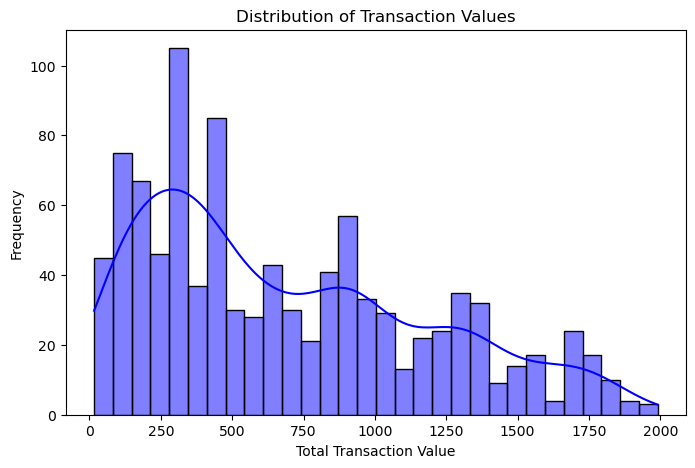

In [63]:
# 3. Distribution of transaction values
plt.figure(figsize=(8, 5))
sns.histplot(transactions['TotalValue'], bins=30, kde=True, color='blue')
plt.title("Distribution of Transaction Values")
plt.xlabel("Total Transaction Value")
plt.ylabel("Frequency")
plt.show()


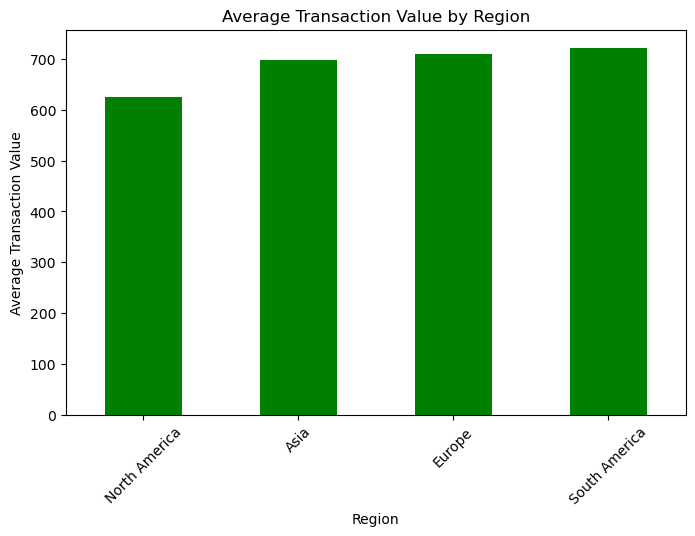

In [65]:
# 4. Average transaction value by region
merged_data = transactions.merge(customers, on='CustomerID')
avg_transaction_value = merged_data.groupby('Region')['TotalValue'].mean().sort_values()
plt.figure(figsize=(8, 5))
avg_transaction_value.plot(kind='bar', color='green')
plt.title("Average Transaction Value by Region")
plt.xlabel("Region")
plt.ylabel("Average Transaction Value")
plt.xticks(rotation=45)
plt.show()

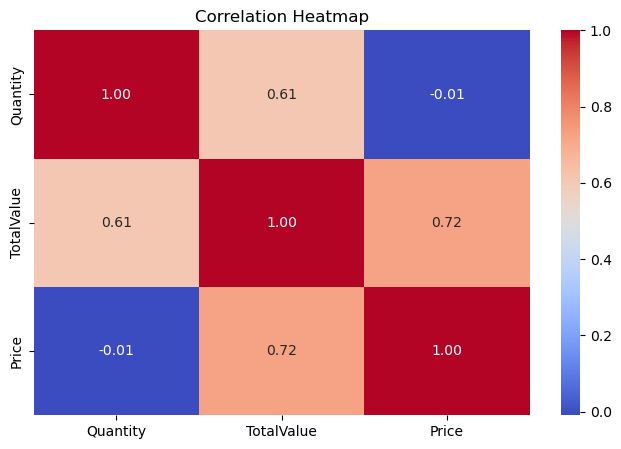

In [69]:
# 5. Correlation heatmap for numerical features
# Select only numeric columns
numeric_columns = transactions.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 5))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Business Insights (Write these insights as part of the PDF report):
# 1. Most customers are concentrated in certain regions, indicating a potential market focus.
# 2. High-priced products are limited and might cater to niche markets; consider introducing more premium products.
# 3. The majority of transactions have moderate total values, but a few high-value transactions contribute significantly.
# 4. Regions with higher average transaction values could indicate higher purchasing power.
# 5. Correlations between numerical features like quantity and total value can guide pricing strategies.